<h1 align='center'> Data Exploration and Analysis of the Impact of Integration on <br> 
    Major League Baseball</h1>
<h4 align='center'> by John K. Hancock</h4>
<h4 align='center'>Email: jkhancock@gmail.com</h4>


In [59]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,10)
import warnings
warnings.filterwarnings('ignore')

<h3>Executive Summary</h3>

The following project is a data exploration and analysis of baseball datasets comparing the 20 years prior to and the 20 years subsequent to the racial integration of Major League Baseball. The goal of the project was to do a statistical analysis of the impact of integration on the game. However, given that there is no legitimate documentation identifying the race of the players, any statistical comparison was would be worthless. 

Instead this project looks at some of the key hitting and pitching changes to the games in both periods. These changes cannot be attributed to integration as there are many other lurking factors such as the geographical expansion of the game. With that said, I took a sample of African American and Non-African American players to get an idea as to how the game changed.




<h3>Introduction</h3>

Founded in America in the 1860s during the Civil War, Major League Baseball ("MLB") is the oldest organized, professional sports league in the world. Prior to 1947, MLB had a “gentlemen’s agreement”, wherein owners agreed to segregate the game based on the race of the players. In 1947, the Brooklyn Dodgers and the Cleveland Indians broke that agreement when they fielded two African American players, Jackie Robinson and Larry Doby. These moves ushered in integration into major league baseball. From 1947 onward, the game would no longer be restricted based on race. 

Ending discrimination meant that MLB would become a true representation of the best players in the world. However, not every team embraced integration early on like the Dodgers and the Indians. It would take 12 years after 1947 for every team to be integrated with at least one African American player. 

<h3>Defining the Problem Statement</h3>

 <b>Would comparing pre- and post-integration statistics give us an answer?</b><br>
We can look at the 20 years of MLB before integration, 1926 to 1946, and the 20 years after integration, 1947 to 1967. Although, this is an arbitrary slicing of the data, it can give us some insight into answering the question since we would be comparing many players who played in both the pre- and post-integration eras. However, it is not a definitive answer to the question.

<b>Is it possible to compare the performance based on the race of the individual players?</b><br>
No demographic data was collected for the teams. In the article, "Baseball Integration, 1947-1986", by Mark Armour, the author also attempted to study the impact of racial integration. He too was unable to accurately classify the race of the players. 

<i>"The first, and ultimately most difficult, step in this study was to determine which players were “black” and which were not. The so-called “color line” was never acknowledged, let alone defined. For other purposes, one might be interested in differentiating between African-American players and dark-skinned Latinos, and in today’s culture we would consider certain players “bi-racial”. ... To summarize, when I refer to “black” players in this study, I am using the term generically to include any player who would have been prohibited from playing major league baseball before 1947."</i><br>

<i>"The main data I relied on for this study was gathered by hand, poring over baseball cards and hundreds of pictures found on the internet. Many SABR members helped me in determining the “race” of the 5490 players."</i><br>

The table below represents Armour's best approximation of the race of the players by looking at player images online and on their baseball cards.<br>

<img src="images/racialdemos.JPG" alt="mlb racial demos" width="400" height="400">

Source: “Baseball Integration, 1947-2012”, by Mark Armour and Daniel R. Levitt. <br>
            (SABR Baseball Biography Project, http://sabr.org/bioproj/topic/baseball-demographics-1947-2012)

    
<br>    
<b>How can we attribute the changes in statistics to the racial demographic changes?</b><br>
Without the racial identification of the players, it's not possible to correlate statistical changes in the game to the race of the player. We can only make inferences by looking at the statistical changes pre- and post- integration. <br>    



<h3>The Problem Statement</h3><br> 
By looking at the aggregate statistics 20 years prior to and the 20 years post racial integration, what were the statistical changes to the game? Although we cannot ascribe these changes directly to the new racial makeup of the players, we can look at leaders in some of the key statistical categories.

<b>Data Source</b><br>

The best resource on the internet for historical baseball data is the Lanham Baseball Database. Created and mainted by Sean Lahman. The resource is an open source collection of baseball statistics. 
This database is copyright 1996-2021 by Sean Lahman. 


This database contains pitching, hitting, and fielding statistics for ajor League Baseball from 1871 through 2020.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 


This work is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.  For details see: http://creativecommons.org/licenses/by-sa/3.0/

More information about the data: http://www.seanlahman.com/baseball-archive/

<h4>Data Preparation</h4>

The data is in 27 different csv files tracking historical baseball statistics from 1871 to 2020. 

<img src="images/LanhamCSVFiles.JPG" alt="Lanham" width="200" height="200">




For this analyis, I only needed the primary tables. Thus, I imported only the Batting, Fielding, People, Pitching, and Teams csv files into a postgresql database:

<img src="images/postgresql.JPG" alt="Tables" width="200" height="200">






Next, using the pre-integration time frame of 20 years prior to integration, 1927 to 1946 and post-integration time frame of 1947 to 1966, I split the tables:

<img src="images/splitTables.JPG" alt="Split Tables" width="200" height="200">





<h3>Data Analysis</h3>

The analysis encompass the following:

1. Import and evaluate the datasets from postgresql
2. Batting <br>
    a. Compare hitting summary statistics for the 20 years prior to integration to the 20 years after integration<br>
    b. Create and compare Slugging Percentage<br>
    c. Looks at the correlation between the increase in HRs to the number of games<br>
3. Pitching<br>
    a. Compare pitching summary statistics for the 20 years prior to integration to the 20 years after integration<br>
    b. Create and compare Walks + Hits /Innings Pitched (WHIP)<br>
    c. Calculates correlations between WHIP/Strikeouts and HRs and Strikeouts<br>
4. Compares the winning percentages between the Dodgers and Red Sox<br>
5. Looks at the offensive performance of a sample of the first African American players and compares that to a sample of Non-African American players.

This project provides observation-data analysis, not a statistical analysis. The project
will look at the data, but it does not create a null hypotheses to test for the statistical significance
of the data.



<h3> Import and Evaluate the Datasets</h3>

In this section, I imported the pre_integration_batting, pre_integration_pitching, post_integration_batting, post_integration_pitching, teams, and people into this Python notebook.  

I created assert statement to confirm the date ranges for pre-integration (the years 1927 to 1946) and post-integration (the years 1947 to 1966). Next, I created a dictionary for the dataframes, printed the shape of each frame and ran a null check.

In [60]:
#Import pre-integration csv files
pre_integration_batting = pd.read_csv('data/pre_integration_batting.csv')
pre_integration_pitching = pd.read_csv('data/pre_integration_pitching.csv')


#Import post-integration csv files
post_integration_batting = pd.read_csv('data/post_integration_batting.csv')
post_integration_pitching = pd.read_csv('data/post_integration_pitching.csv')


#Import teams and people csv files
teams = pd.read_csv('data/teams.csv')
people = pd.read_csv('data/people.csv')


In [61]:
# Verify the minimum dates for the pre- and post-integration periods. To do this, create an assert statement which confirms the
# date range

assert(min(pre_integration_batting['yearid']) == 1927)
assert(min(pre_integration_pitching['yearid']) == 1927)


assert(max(pre_integration_batting['yearid']) == 1946)
assert(max(pre_integration_pitching['yearid']) == 1946)



assert(min(post_integration_batting['yearid']) == 1947)
assert(min(post_integration_pitching['yearid']) == 1947)


assert(max(post_integration_batting['yearid']) == 1966)
assert(max(post_integration_pitching['yearid']) == 1966)

In [62]:
#Create a dictionary of dataframes which will be used later in the code.

dataframes_dict = {'pre_integration_batting':pre_integration_batting,  
                   'pre_integration_pitching':pre_integration_pitching, 
                   'post_integration_batting':post_integration_batting,
                   'post_integration_pitching':post_integration_pitching, 
                   'teams':teams,
                   'people':people
                  }

In [63]:
# Create a function that prints the shape of each data framse.

def printShape(name, df):
    '''
    Takes in a dictionary listing of multiple pandas dataframes
    and prints to the screen the shape of each dataframe.   
    '''
    shape = df.shape
    print(f'The shape of {name} is {shape}.')

for key, value in dataframes_dict.items():
    printShape(key, value)
    

The shape of pre_integration_batting is (10888, 22).
The shape of pre_integration_pitching is (4558, 30).
The shape of post_integration_batting is (13002, 22).
The shape of post_integration_pitching is (5520, 30).
The shape of teams is (2955, 48).
The shape of people is (20358, 24).


In [64]:
def checkForNulls (name, df):
    '''
    Takes in a dictionary listing of multiple pandas dataframes
    and prints to the screen the number of nulls for each dataframe.   
    '''
    
    number_of_nulls = df.isnull().values.sum()
    print(f'The number of null values for {name} is {number_of_nulls}.')

for key, value in dataframes_dict.items():
    checkForNulls(key, value)



The number of null values for pre_integration_batting is 31039.
The number of null values for pre_integration_pitching is 18248.
The number of null values for post_integration_batting is 9569.
The number of null values for post_integration_pitching is 18536.
The number of null values for teams is 12870.
The number of null values for people is 68278.


<h3>Batting</h3>

In the pre-integration batting dataset, there are 10,888 observations over 22 attributes. For the post-integration dataset, there are 13,002 observations over 22 attributes. The additional observations represent the growth in the sport of the number of teams and players. 

In [65]:
pre_integration_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10888 entries, 0 to 10887
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerid  10888 non-null  object 
 1   yearid    10888 non-null  int64  
 2   stint     10888 non-null  int64  
 3   teamid    10888 non-null  object 
 4   lgid      10888 non-null  object 
 5   games     10888 non-null  int64  
 6   ab        10888 non-null  int64  
 7   runs      10888 non-null  int64  
 8   hits      10888 non-null  int64  
 9   double    10888 non-null  int64  
 10  triple    10888 non-null  int64  
 11  hr        10888 non-null  int64  
 12  rbi       10888 non-null  int64  
 13  sb        10888 non-null  int64  
 14  cs        5532 non-null   float64
 15  bb        10888 non-null  int64  
 16  so        10888 non-null  int64  
 17  ibb       336 non-null    float64
 18  hbp       10888 non-null  int64  
 19  sh        10888 non-null  int64  
 20  sf        335 non-null    fl

In [66]:
post_integration_batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13002 entries, 0 to 13001
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerid  13002 non-null  object 
 1   yearid    13002 non-null  int64  
 2   stint     13002 non-null  int64  
 3   teamid    13002 non-null  object 
 4   lgid      13002 non-null  object 
 5   games     13002 non-null  int64  
 6   ab        13002 non-null  int64  
 7   runs      13002 non-null  int64  
 8   hits      13002 non-null  int64  
 9   double    13002 non-null  int64  
 10  triple    13002 non-null  int64  
 11  hr        13002 non-null  int64  
 12  rbi       13002 non-null  int64  
 13  sb        13002 non-null  int64  
 14  cs        11888 non-null  float64
 15  bb        13002 non-null  int64  
 16  so        13002 non-null  int64  
 17  ibb       8499 non-null   float64
 18  hbp       13002 non-null  int64  
 19  sh        13002 non-null  int64  
 20  sf        9050 non-null   fl

<h4>Stolen Bases</h4>

In the code blocks below, I checked for nulls among stolen bases. Next, I created two separate dataframes (pre- and post-integration) for stolen bases.  I used bar charts to compare stolen bases for the previous time periods.

In [67]:
#Check for null values among
pre_integration_batting['sb'].isnull().values.sum()

0

I used bar charts to compare stolen bases for the previous time periods.From the visual, we see that there was no real change from one period to another until the last five years (1962 to 1966). 

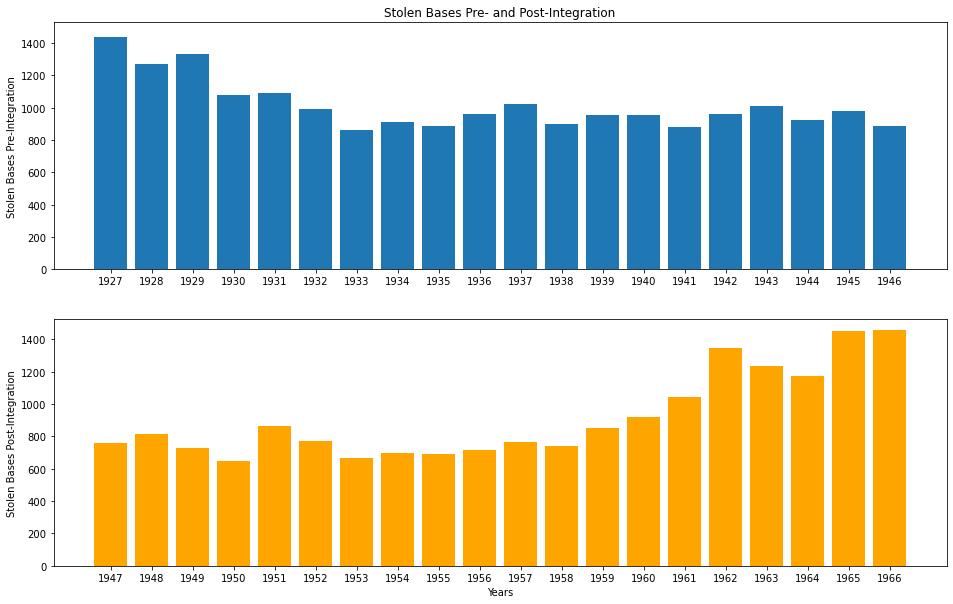

In [68]:
pre_sb = pd.DataFrame(pre_integration_batting.groupby(pre_integration_batting.yearid)['sb'].sum())
pre_sb.reset_index(level=0, inplace=True)

post_sb = pd.DataFrame(post_integration_batting.groupby(post_integration_batting.yearid)['sb'].sum())
post_sb.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(2, 1, sharey=True)

# Plot the pre-integration stolen bases
ax[0].bar(pre_sb.yearid, pre_sb.sb)

# In the top right (index 0,1), plot month and Seattle temperatures
ax[1].bar(post_sb.yearid, post_sb.sb, color='orange')

ax[0].set_ylabel("Stolen Bases Pre-Integration")
ax[0].set_xticks(pre_sb.yearid)
ax[1].set_ylabel("Stolen Bases Post-Integration")
ax[1].set_xlabel("Years")
ax[1].set_xticks(post_sb.yearid)
ax[0].set_title("Stolen Bases Pre- and Post-Integration")


plt.show()



<h4>Hits</h4>

Intrestingly, hits followed a downward slope from the pre- into the post-integration period until 1960 when there was a sharp spike in the number of hits. 


Text(0.5, 1.0, 'Comparison of Pre- and Post-Integration Hits')

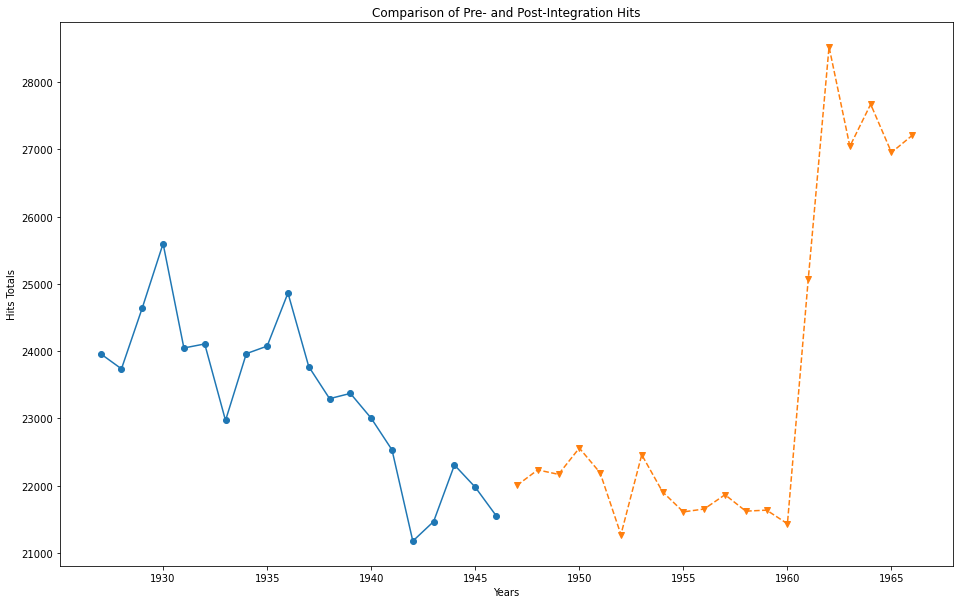

In [69]:
pre_hits = pd.DataFrame(pre_integration_batting.groupby(pre_integration_batting.yearid)['hits'].sum())
pre_hits.reset_index(level=0, inplace=True)

post_hits = pd.DataFrame(post_integration_batting.groupby(post_integration_batting.yearid)['hits'].sum())
post_hits.reset_index(level=0, inplace=True)

fig, ax = plt.subplots()

# Plot year against the HR totals for each year pre-integration
ax.plot(pre_hits.yearid, pre_hits.hits, marker="o")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(post_hits.yearid, post_hits.hits, marker="v", linestyle ='--')

ax.set_xlabel("Years")
ax.set_ylabel("Hits Totals")
ax.set_title("Comparison of Pre- and Post-Integration Hits")



<h4>Runs</h4>

A similar pattern occurs with runs. The scatter plot below shows a downward trend in total runs followed by an increasing trend and then major spikes in the early 1960s. 

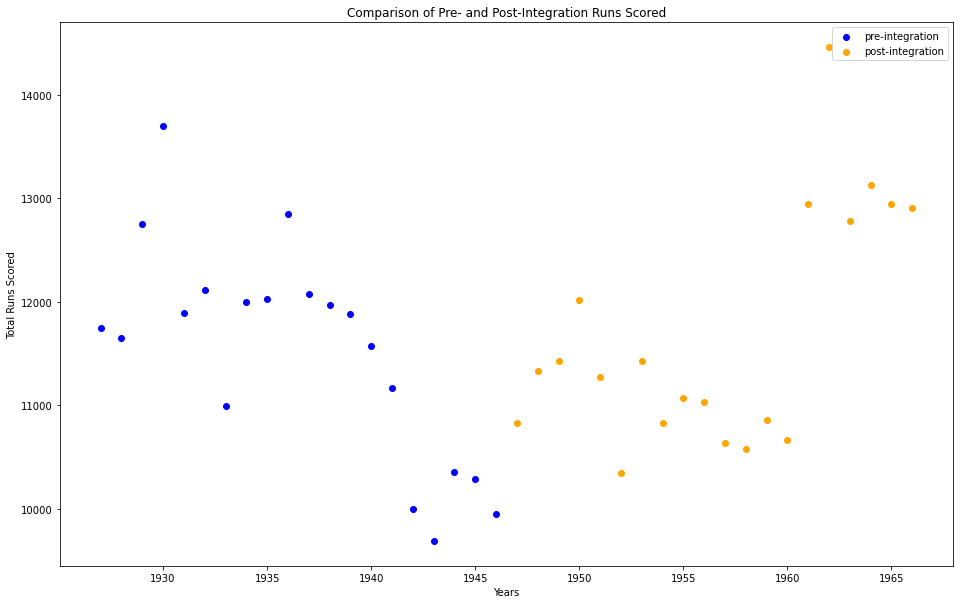

In [70]:
pre_runs = pd.DataFrame(pre_integration_batting.groupby(pre_integration_batting.yearid)['runs'].sum())
pre_runs.reset_index(level=0, inplace=True)

post_runs = pd.DataFrame(post_integration_batting.groupby(post_integration_batting.yearid)['runs'].sum())
post_runs.reset_index(level=0, inplace=True)


fig, ax = plt.subplots()
ax.scatter(pre_runs.yearid, pre_runs.runs, color='blue', label='pre-integration')
ax.scatter(post_runs.yearid, post_runs.runs, color='orange', label='post-integration')
ax.legend()

ax.set_xlabel("Years")
ax.set_ylabel("Total Runs Scored")
ax.set_title("Comparison of Pre- and Post-Integration Runs Scored")

plt.show()

<h4>Home Runs</h4>

Finally, the decline/surge pattern for HRs is similar to the previous offensive patterns. Sharp increases as the period of integration moves along with an increasing number of non-White players. 

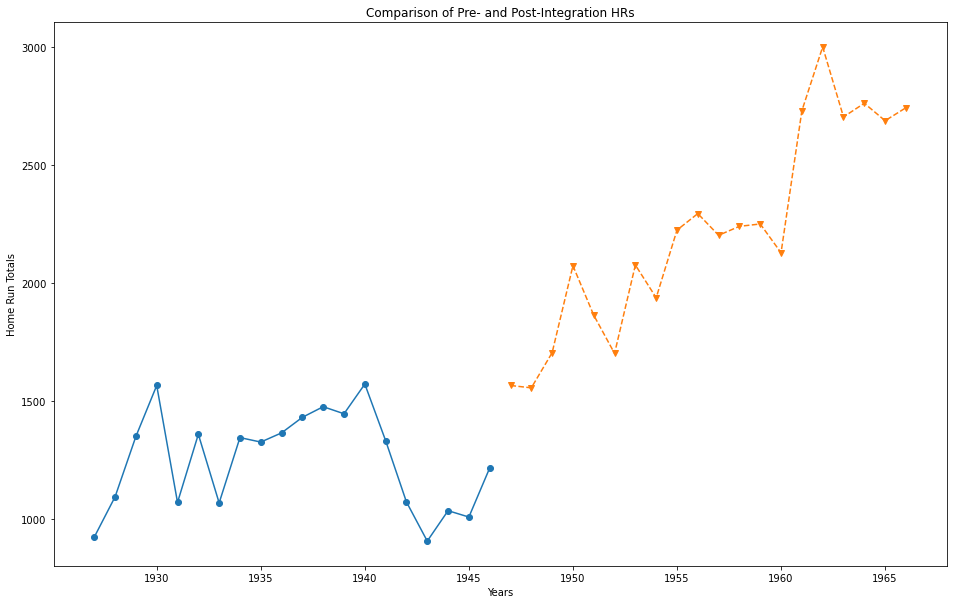

In [71]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot year against the HR totals for each year pre-integration
ax.plot(pre_integration_batting.groupby(pre_integration_batting.yearid)['hr'].sum(), marker="o")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(post_integration_batting.groupby(post_integration_batting.yearid)['hr'].sum(), marker="v", linestyle ='--')

ax.set_xlabel("Years")
ax.set_ylabel("Home Run Totals")
ax.set_title("Comparison of Pre- and Post-Integration HRs")

# Call the show function
plt.show()

<h4>Slugging Percentage</h4>

The statistic, Slugging Percentage ('SLG'), is a ratio that assigns weights to hits based on how many bases the hit resulted in, for example, a weight of 3 is assigned to a triple and a weight of 4 is assigned to a hr. This this then divided by the number of ABs that a hitter has. 
    
Intrestingly, the average SLG pct is higher in the pre-integration era. This may be due to fewer teams in that era and fewer players. 


In [72]:
#Calculate singles from hits
def calcSingles(hits, double, triple, hr):
    '''
    Takes in four integers and returns hits minus the sum of double, triple, and hr.
    This results in Singles. 
    '''
    return hits - (double+triple+hr)



#Formula for SLG percentage
def calc_SLG(Single, Double, Triple, HR, AB):
    '''
    Takes in four integers and returns a float or sluggin percentage.
    '''
    AB.replace(0,1, inplace=True)
    return (Single + (2 *Double) + (3*Triple) + (4*HR)) / AB
    
 
    


In [73]:
pre_integration_batting['single'] = calcSingles(pre_integration_batting.hits,
                                                pre_integration_batting.double,
                                                pre_integration_batting.triple,
                                                pre_integration_batting.hr)


post_integration_batting['single'] = calcSingles(post_integration_batting.hits,
                                                post_integration_batting.double,
                                                post_integration_batting.triple,
                                                post_integration_batting.hr)


pre_integration_batting['SLG_PCT']  = calc_SLG(pre_integration_batting.single,
                                                pre_integration_batting.double,
                                                pre_integration_batting.triple,
                                                pre_integration_batting.hr,
                                                pre_integration_batting.ab)

post_integration_batting['SLG_PCT']  = calc_SLG(post_integration_batting.single,
                                                post_integration_batting.double,
                                                post_integration_batting.triple,
                                                post_integration_batting.hr,
                                                post_integration_batting.ab)


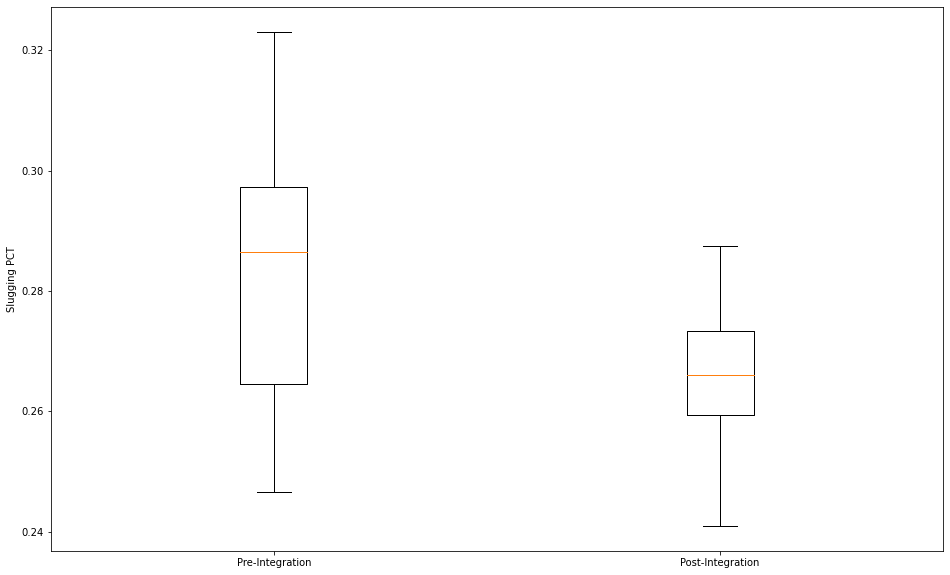

In [74]:
fig, ax = plt.subplots()
ax.boxplot([pre_integration_batting.groupby('yearid')['SLG_PCT'].mean(),
          post_integration_batting.groupby('yearid')['SLG_PCT'].mean()])
ax.set_xticklabels(["Pre-Integration", "Post-Integration"])
ax.set_ylabel("Slugging PCT")
plt.show()

<h4> Correlation between HRs and Number of Games </h4>

The visualization below shows a strong correlation between the number of games and the number of homeruns. As the number of games increased, so did the number of homeruns. 


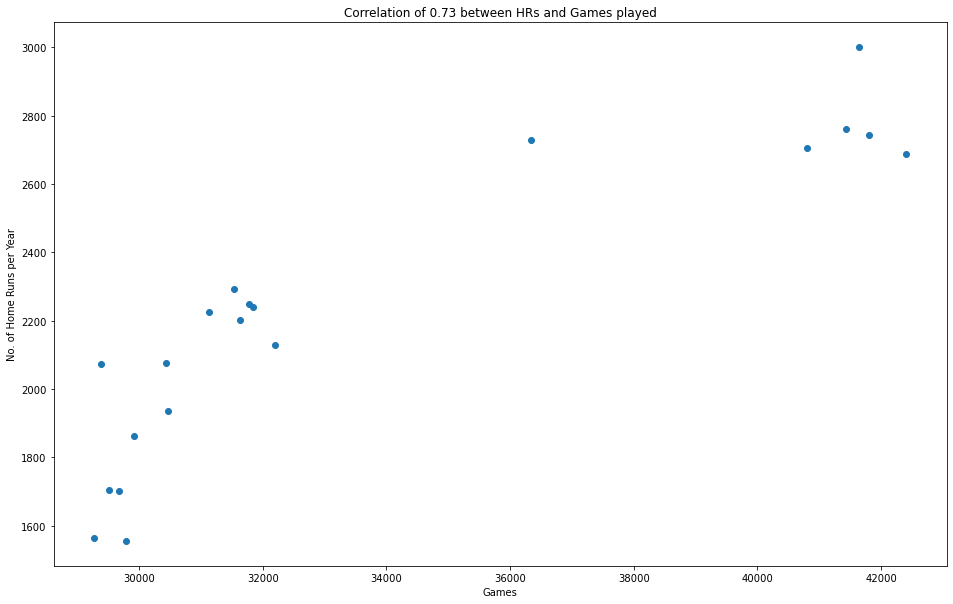

In [75]:
#Correlation between HRs and the number of games'

corr = stats.pearsonr(post_integration_batting.games, post_integration_batting.hr)
corr = round(corr[0],2)
x = post_integration_batting.groupby('yearid')['games'].sum()
y  = post_integration_batting.groupby('yearid')['hr'].sum()
plt.scatter(x, y)
plt.xlabel('Games')
plt.ylabel('No. of Home Runs per Year')
plt.title(f'Correlation of {corr} between HRs and Games played')
plt.show()



<h3>Pitching</h3>
For pitching, I looked at Earned Runs ("ER"), Strikeouts ("SO"), Opponents Batting Average Against ("BAOPP"), Walks ("W"), 
and Walks+Hits to Innings Pitched ("WHIP")

<h4> Earned Runs </h4>

The average number of earned runs in the pre-integration period was higher at 43.72 versus the post-integration period at 37.62. 


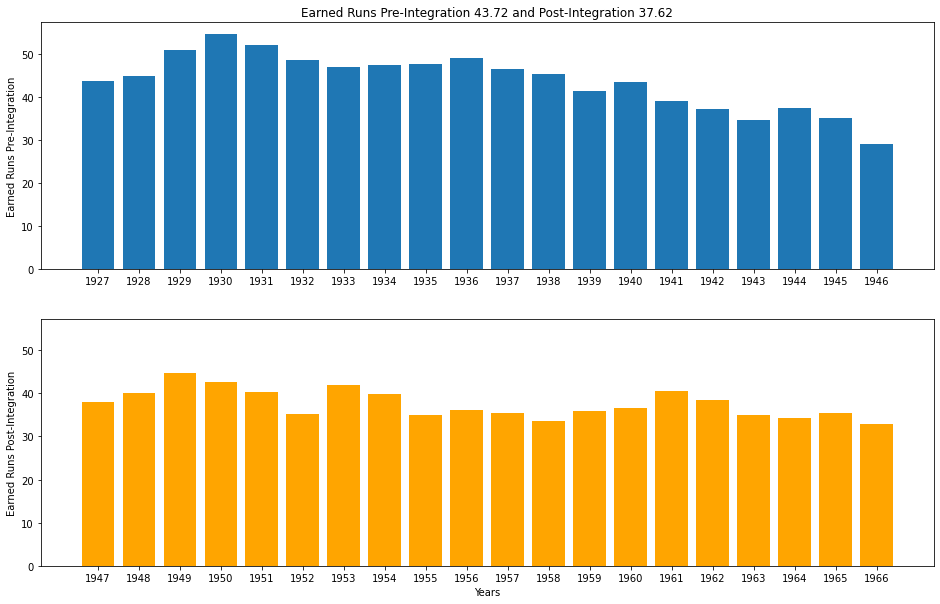

In [76]:
pre_er = pd.DataFrame(pre_integration_pitching.groupby(pre_integration_pitching.yearid)['er'].mean())
pre_er.reset_index(level=0, inplace=True)

post_er = pd.DataFrame(post_integration_pitching.groupby(post_integration_pitching.yearid)['er'].mean())
post_er.reset_index(level=0, inplace=True)

avg_er_pre = round(pre_er.er.mean(),2)
avg_er_post = round(post_er.er.mean(),2)

fig, ax = plt.subplots(2, 1, sharey=True)

# Plot the pre-integration stolen bases
ax[0].bar(pre_er.yearid, pre_er.er)

# In the top right (index 0,1), plot month and Seattle temperatures
ax[1].bar(post_er.yearid, post_er.er, color='orange')

ax[0].set_ylabel("Earned Runs Pre-Integration")
ax[0].set_xticks(pre_sb.yearid)
ax[1].set_ylabel("Earned Runs Post-Integration")
ax[1].set_xlabel("Years")
ax[1].set_xticks(post_sb.yearid)
ax[0].set_title(f"Earned Runs Pre-Integration {avg_er_pre} and Post-Integration {avg_er_post}")


plt.show()


<h4> Strike Outs ("SO") </h4>

Similar to the batting statistics earlier, there is a huge spike in the number of strikeouts during the post-integration period. In particular, see the huge spike from 1960 to 1964.

Text(0.5, 1.0, 'Comparison of Pre- and Post-Integration Strike Outs')

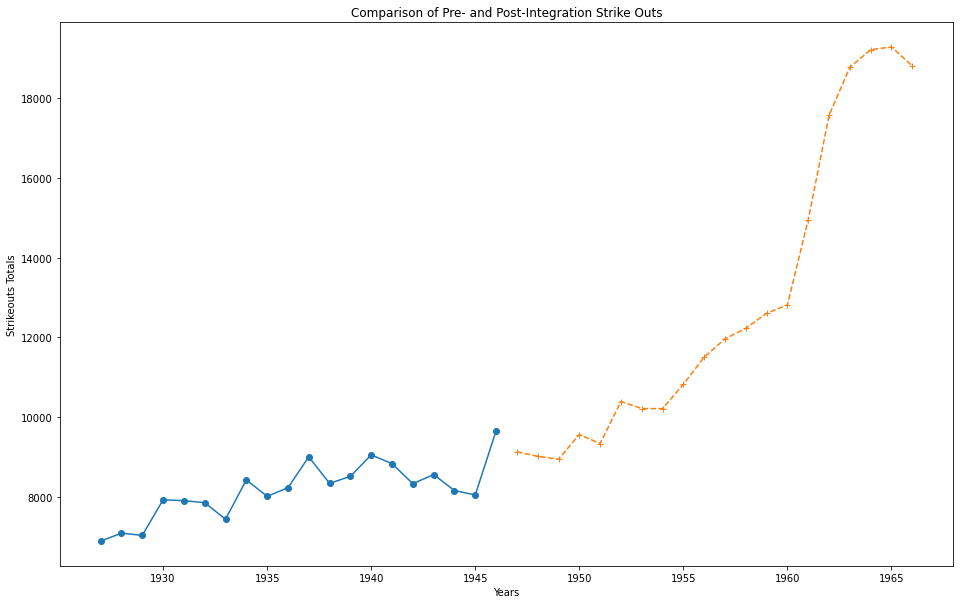

In [77]:
pre_so = pd.DataFrame(pre_integration_pitching.groupby(pre_integration_pitching.yearid)['so'].sum())
pre_so.reset_index(level=0, inplace=True)

post_so = pd.DataFrame(post_integration_pitching.groupby(post_integration_pitching.yearid)['so'].sum())
post_so.reset_index(level=0, inplace=True)


fig, ax = plt.subplots()

# Plot year against the HR totals for each year pre-integration
ax.plot(pre_so.yearid, pre_so.so, marker="o")

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(post_so.yearid, post_so.so, marker="+", linestyle ='--')

ax.set_xlabel("Years")
ax.set_ylabel("Strikeouts Totals")
ax.set_title("Comparison of Pre- and Post-Integration Strike Outs")


<h4>Opponents Batting Average Against ("BAOPP")</h4>

During the post-integration era, the opponents batting average against declines percipitously especially during the years 1965 and 1966. This shows us that the pitching improved greatly during this period. 

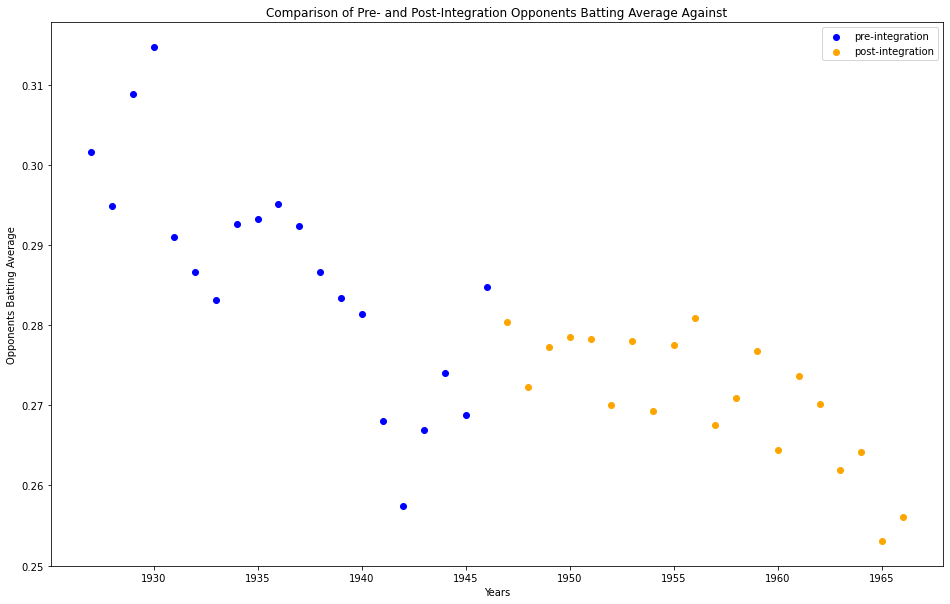

In [78]:
pre_baopp = pd.DataFrame(pre_integration_pitching.groupby(pre_integration_pitching.yearid)['baopp'].mean())
pre_baopp.reset_index(level=0, inplace=True)

post_baopp = pd.DataFrame(post_integration_pitching.groupby(post_integration_pitching.yearid)['baopp'].mean())
post_baopp.reset_index(level=0, inplace=True)


fig, ax = plt.subplots()
ax.scatter(pre_baopp.yearid, pre_baopp.baopp, color='blue', label='pre-integration')
ax.scatter(post_baopp.yearid, post_baopp.baopp, color='orange', label='post-integration')
ax.legend()

ax.set_xlabel("Years")
ax.set_ylabel("Opponents Batting Average")
ax.set_title("Comparison of Pre- and Post-Integration Opponents Batting Average Against")

plt.show()

<h4> Walks </h4>

Over 23,000 more walks issued during the post-integration period. 


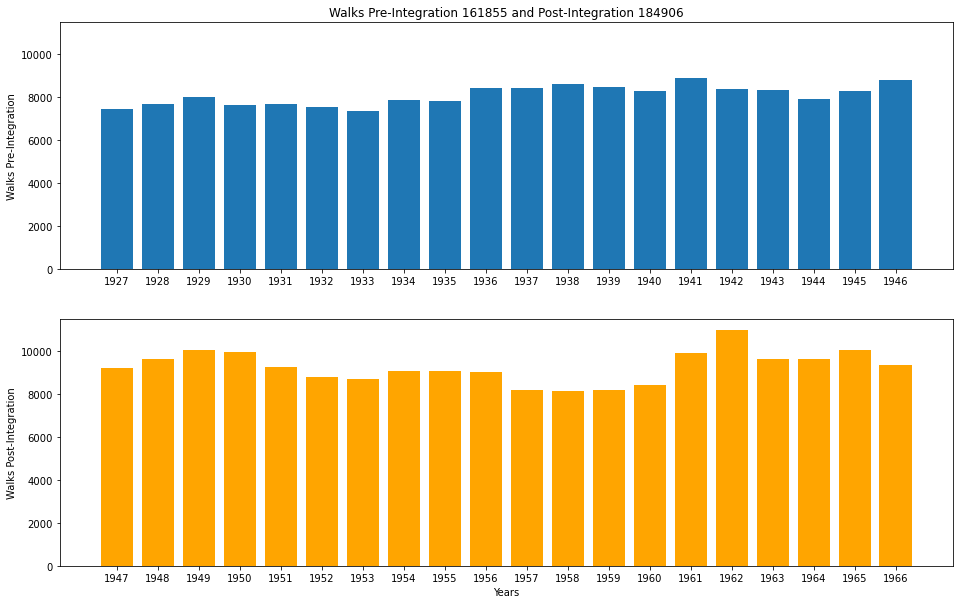

In [79]:
pre_bb = pd.DataFrame(pre_integration_pitching.groupby(pre_integration_pitching.yearid)['bb'].sum())
pre_bb.reset_index(level=0, inplace=True)

pre_walks = round(pre_bb.bb.sum(),2)

post_bb = pd.DataFrame(post_integration_pitching.groupby(post_integration_pitching.yearid)['bb'].sum())
post_bb.reset_index(level=0, inplace=True)
post_walks = round(post_bb.bb.sum(),2)

fig, ax = plt.subplots(2, 1, sharey=True)

# Plot the pre-integration stolen bases
ax[0].bar(pre_bb.yearid, pre_bb.bb)

# In the top right (index 0,1), plot month and Seattle temperatures
ax[1].bar(post_bb.yearid, post_bb.bb, color='orange')

ax[0].set_ylabel("Walks Pre-Integration")
ax[0].set_xticks(pre_sb.yearid)
ax[1].set_ylabel("Walks Post-Integration")
ax[1].set_xlabel("Years")
ax[1].set_xticks(post_sb.yearid)
ax[0].set_title(f"Walks Pre-Integration {pre_walks} and Post-Integration {post_walks}")

plt.show()

<h4>WHIP</h4>

The box plots below show that the WHIP in the post-integration error was lower than in the pre-integration era. 

In [80]:
#Formula for WHIP
def calc_WHIP(BB, H, IP): 
    IP.replace(0,1)
    return  (BB + H) / (IP / 3)     

In [81]:
pre_integration_pitching = pre_integration_pitching.loc[pre_integration_pitching['ipouts'] != 0,]
post_integration_pitching = post_integration_pitching.loc[post_integration_pitching['ipouts'] != 0,]

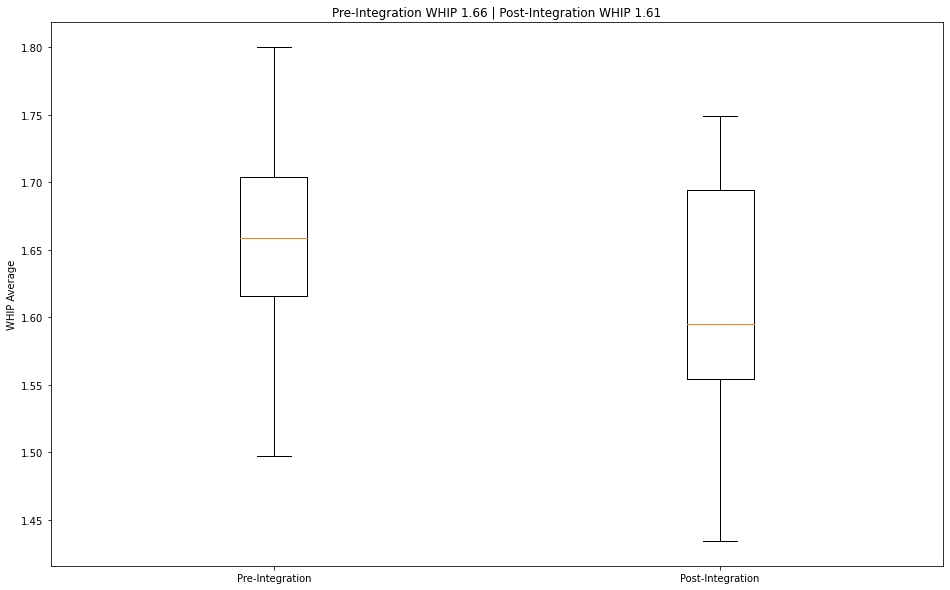

In [82]:
pre_integration_pitching['WHIP'] = calc_WHIP(pre_integration_pitching.bb,
                                             pre_integration_pitching.hits,
                                             pre_integration_pitching.ipouts  
                                            )

post_integration_pitching['WHIP'] = calc_WHIP(post_integration_pitching.bb,
                                             post_integration_pitching.hits,
                                             post_integration_pitching.ipouts    
                                            )
pre_whip = pre_integration_pitching.groupby('yearid')['WHIP'].mean()
pre_whip = round(pre_whip.mean(),2)
post_whip = post_integration_pitching.groupby('yearid')['WHIP'].mean()
post_whip = round(post_whip.mean(),2)


fig, ax = plt.subplots()
ax.boxplot([pre_integration_pitching.groupby('yearid')['WHIP'].mean(),
          post_integration_pitching.groupby('yearid')['WHIP'].mean()])
ax.set_xticklabels(["Pre-Integration", "Post-Integration"])
ax.set_ylabel("WHIP Average")
ax.set_title(f'Pre-Integration WHIP {pre_whip} | Post-Integration WHIP {post_whip}')

plt.show()

<h3> Teams </h3>



The Dodgers were the earliest adopters of racial integration. The last team to integrate was the Boston Red Sox who did not integrate until 1959. The time series chart below compares he number of wins between the two teams from 1947 to 1959. The Dodgers averaged 8 more wins over this time period than the Red Sox. Additionally, the Dodgers won 4 NL pennants and 2 World Series titles during this period, and the Red Sox won neither.

This analysis does not prove that early adoption of racial integration contributed to the Dodgers’ success. Nor does it prove that the Red Sox’s performance was hampered by being late adopters to racial integration. The analysis does shows that the team that was the earliest adopter enjoyed a higher average number of wins from 1947 through 1959 along with post-season
success. Also, it does show that racial integration did not hamper the Dodgers’ success.

In [83]:
Post_Teams_df = teams[teams['yearid'].isin(range(1947, 1960))]

In [84]:
Post_Teams_df['wins_pct']  = Post_Teams_df.wins / Post_Teams_df.games

In [85]:
BOS_df = Post_Teams_df[['yearid','franchid','name', 'wins', 'wins_pct']].loc[Post_Teams_df.franchid.isin(['BOS'])].sort_values(['yearid'])
LA_df  = Post_Teams_df[['yearid','franchid','name', 'wins','wins_pct']].loc[Post_Teams_df.franchid.isin(['LAD'])].sort_values(['yearid'])
BOS_v_LA_df = pd.merge(BOS_df, LA_df, on=['yearid'])
BOS_v_LA_df.reset_index(inplace=True, drop=True)
BOS_v_LA_df.head(14)

,yearid,franchid_x,name_x,wins_x,wins_pct_x,franchid_y,name_y,wins_y,wins_pct_y
0,1947,BOS,Boston Red Sox,83,0.528662,LAD,Brooklyn Dodgers,94,0.606452
1,1948,BOS,Boston Red Sox,96,0.619355,LAD,Brooklyn Dodgers,84,0.541935
2,1949,BOS,Boston Red Sox,96,0.619355,LAD,Brooklyn Dodgers,97,0.621795
3,1950,BOS,Boston Red Sox,94,0.610390,LAD,Brooklyn Dodgers,89,0.574194
4,1951,BOS,Boston Red Sox,87,0.564935,LAD,Brooklyn Dodgers,97,0.613924
5,1952,BOS,Boston Red Sox,76,0.493506,LAD,Brooklyn Dodgers,96,0.619355
6,1953,BOS,Boston Red Sox,84,0.549020,LAD,Brooklyn Dodgers,105,0.677419
7,1954,BOS,Boston Red Sox,69,0.442308,LAD,Brooklyn Dodgers,92,0.597403
8,1955,BOS,Boston Red Sox,84,0.545455,LAD,Brooklyn Dodgers,98,0.636364
9,1956,BOS,Boston Red Sox,84,0.541935,LAD,Brooklyn Dodgers,93,0.603896


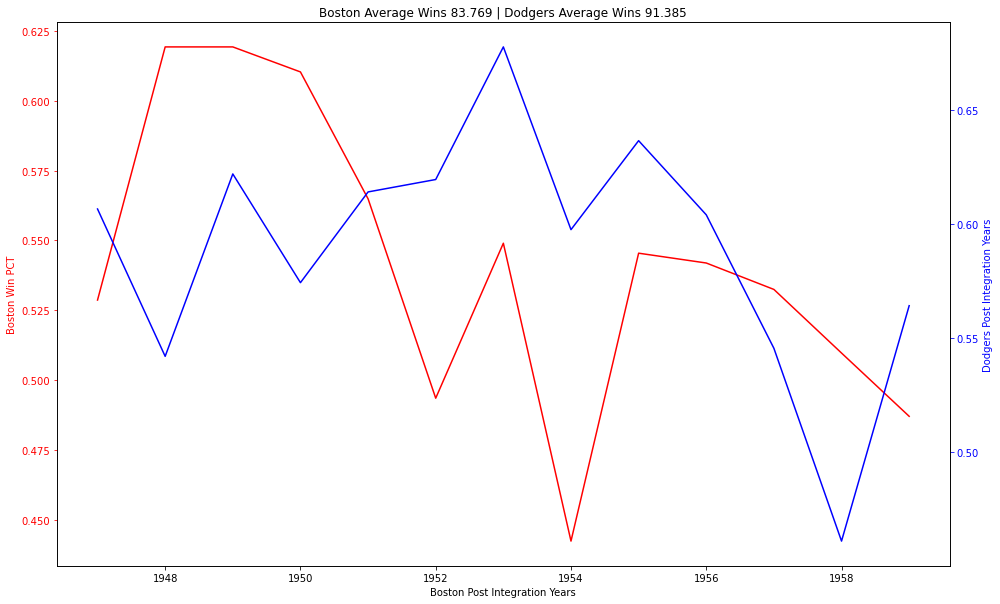

In [86]:
bos_avg_wins = round(BOS_v_LA_df.wins_x.mean(),3)
dodgers_avg_wins = round(BOS_v_LA_df.wins_y.mean(),3)


fig, ax = plt.subplots()
ax.plot(BOS_v_LA_df.yearid, BOS_v_LA_df['wins_pct_x'], color='red')
ax.set_xlabel('Boston Post Integration Years')
ax.set_ylabel('Boston Win PCT', color='red')
ax.tick_params('y', colors='red')
ax.set_title(f'Boston Average Wins {bos_avg_wins} | Dodgers Average Wins {dodgers_avg_wins}')

ax2 = ax.twinx()
ax2.plot(BOS_v_LA_df.yearid, BOS_v_LA_df['wins_pct_y'], color='blue')
ax2.set_ylabel('Dodgers Post Integration Years', color='blue')
ax2.tick_params('y', colors='blue')
plt.show()

<h3>Sample of African American Players</h3>

As stated earlier, it's not possible to accurately assess the impact of racial integration due to the lack of racial identification of the players. In this last section, I compared a sample of some of the first African American players to Non-African American players. 

I looked at how each sample impacted Runs Created which is an advanced statistic that shows how a hitter contributes to runs for his team. 

In [87]:
#Create two lists identifying African American and Non African American players 
AA_Hitters_List = ['aaronha01','alstoto01','bankser01','dobyla01','escalni01',
'robinfr02','greenpu01','harmoch01','howarel01','irvinmo01','jethrsa01','kennejo02','mayswi01',
'minosmi01','paulaca01','robercu01','robinja02','camparo01','stargwi01','thompha02','tricebo01','virgioz01']

Non_AA_Hitters_List = ['joneswi01','phillda01','aparilu01','bondwa01','santoro01','marisro01','virdobi01','coxbi02','hodgegi01','phillda01','snidedu01','colavro01','kindaje01',
'rosarbu01','lynchje01','postwa01','lollash01','elliobo01','mazerbi01','kuennha01','alouma01','lumpeje01']

In [88]:
#Use the lists to pull from the post-integration datasets

AA_Hitters_df = post_integration_batting.loc[post_integration_batting['playerid'].isin(AA_Hitters_List)]
Non_AA_Hitters_df = post_integration_batting.loc[post_integration_batting['playerid'].isin(Non_AA_Hitters_List)]

<h4>Runs created (RC)</h4> 

Runs Created is a baseball statistic invented by Bill James to estimate the number of runs a hitter contributes to his team. It is used to evaluate an individual’s contribution to a team’s total number of runs. Below is the formula for Runs Created:

<img src="images/rc.JPG" alt="runs created" width="800" height="1200">



In [89]:
ab_difference = Non_AA_Hitters_df.ab.sum() - AA_Hitters_df.ab.sum()
print(f'In our sample, we see that there are {ab_difference} less at bats for the African American players than for the Non African American players.')

In our sample, we see that there are 27014 less at bats for the African American players than for the Non African American players.


Below, I created a function based on runs created formula and added the stat to the datasets.

In [90]:
def runs_created(AB,
                 Hits,
                 BB, 
                 CS, 
                 HBP, 
                 GIDP, 
                 Single,
                 Double, 
                 Triple, 
                 HR,  
                 IBB, 
                 SH, 
                 SF, 
                 SB, SO):
    A = (Hits + BB) - (CS + HBP) - GIDP
    B = (1.125*Single) + (1.69*Double) + (3.02*Triple) + (3.73*HR) + (.29 * (BB - IBB + HBP)) + (.492 * (SH+SF+SB)) - (.04*SO)
    C = AB + BB + HBP + SH + SF
    D = ((2.4*C + A) * (3*C+B))
    E = 9*C
    F = D / E     
    RC = F - .9*C
    return RC

In [91]:
AA_Hitters_df['rc'] = runs_created(AA_Hitters_df.ab,
                     AA_Hitters_df.hits,
                    AA_Hitters_df.bb,
                    AA_Hitters_df.cs,
                    AA_Hitters_df.hbp,
                    AA_Hitters_df.gidp,
                    AA_Hitters_df.single,
                    AA_Hitters_df.double,
                    AA_Hitters_df.triple,
                    AA_Hitters_df.hr,
                    AA_Hitters_df.ibb,
                    AA_Hitters_df.sh,
                    AA_Hitters_df.sf,
                    AA_Hitters_df.sb,
                    AA_Hitters_df.so)

AA_Hitters_df['rc'].fillna(0, inplace=True)
AA_Hitters_df['rc'].tail(10)

12046     99.208973
12133     78.221698
12183      5.146098
12228    111.706859
12267     61.932878
12556     44.328345
12674    105.046078
12820    125.533028
12907     94.229482
12960      5.378956
Name: rc, dtype: float64

In [92]:
Non_AA_Hitters_df['rc'] = runs_created(Non_AA_Hitters_df.ab,
                     Non_AA_Hitters_df.hits,
                    Non_AA_Hitters_df.bb,
                    Non_AA_Hitters_df.cs,
                    Non_AA_Hitters_df.hbp,
                    Non_AA_Hitters_df.gidp,
                    Non_AA_Hitters_df.single,
                    Non_AA_Hitters_df.double,
                    Non_AA_Hitters_df.triple,
                    Non_AA_Hitters_df.hr,
                    Non_AA_Hitters_df.ibb,
                    Non_AA_Hitters_df.sh,
                    Non_AA_Hitters_df.sf,
                    Non_AA_Hitters_df.sb,
                    Non_AA_Hitters_df.so)


Non_AA_Hitters_df['rc'].fillna(0, inplace=True)
Non_AA_Hitters_df['rc'].tail()

12655     30.950947
12657      4.046778
12665     38.933237
12675     69.053673
12849    116.003398
Name: rc, dtype: float64

The total runs created by African American players was: 7760.64, and the total runs created by our sample Non-African American players was 9419.86. Again, this is based on over 27,000 less ABs. 

The mean RC for African American players was higher than that of the Non African American players.

In [93]:
AA_rc = round(AA_Hitters_df['rc'].sum(),2)
Non_AA_rc = round(Non_AA_Hitters_df['rc'].sum(),2)
print(f'African American RC: {AA_rc}. Non-African American: {Non_AA_rc}')


African American RC: 7760.65. Non-African American: 9419.86


In [94]:
AA_rc_mean = round(AA_Hitters_df['rc'].mean(),2)
Non_AA_rc_mean = round(Non_AA_Hitters_df['rc'].mean(),2)
print(f'The mean African American RC: {AA_rc_mean}. The mean Non-African American: {Non_AA_rc_mean}')

The mean African American RC: 44.09. The mean Non-African American: 36.37


In [95]:
AA_rc_std = round(AA_Hitters_df['rc'].std(),2)
Non_AA_rc_std = round(Non_AA_Hitters_df['rc'].std(),2)
print(f'The standard deviation African American RC: {AA_rc_std}. The standard deviation Non-African American: {Non_AA_rc_std}')

The standard deviation African American RC: 49.03. The standard deviation Non-African American: 36.27


<h3>Conclusion</h3>

Integration of MLB began in 1947. Twenty years later, the percentage of Non White players increased to over 24%. Concurrently, offense in MLB exploded. Hits, Runs Scored, Home runs, and Stolen bases all spiked as the game became more integrated. We also saw that Strikeouts spiked and the Opponents Batting Average plummet. The Dodgers, who were the first to integrate, out performed the Red Sox who were the last to integrate. 

This project was an exploration of data, not a test of a hypothesis. I cannot, and did not prove, that integration was the sole or main explanation as to why different batting, pithcing, and other statistics performed the way that they did. For example, the number of teams, geographical expansion of the game could also be the reason why the game changed. 


